In [11]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [12]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

In [13]:
def load_mnist_csv(path):
    data = np.loadtxt(path, delimiter=',', skiprows=1)
    x = data[:, 1:] / 255.0 
    t = data[:, 0].astype(int)
    return x, t

In [14]:
def get_data():
    x_train, t_train = load_mnist_csv('dataset/mnist_train.csv')
    x_test, t_test = load_mnist_csv('dataset/mnist_test.csv')
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = relu(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = relu(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

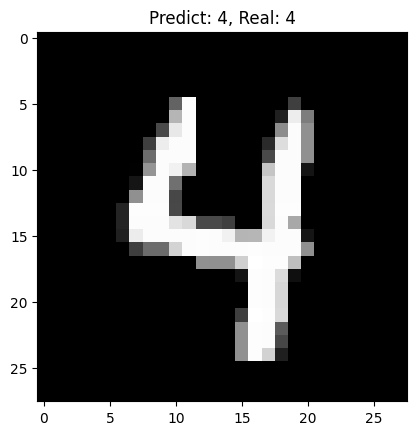

In [16]:
import random

x, t = get_data() # 정규화 및 1차원 배열로 변환
network = init_network() # sample_weight.pkl 불러오기

random_index = random.randint(0, len(x) - 1)
random_image = x[random_index]
random_label = t[random_index]

predicted_output = predict(network, random_image) # 랜덤이미지를 predict로 추론
predicted_label = np.argmax(predicted_output) # 높은 값의 인덱스 찾기

plt.imshow(random_image.reshape(28, 28), cmap="gray") 
plt.title(f"Predict: {predicted_label}, Real: {random_label}")
plt.show()